# Example - The churn model

### Introduction

The term **churn** is used in marketing to refer to a customer leaving the company in favour of a competitor. Churning is a common concern of **Customer Relationship Management** (CRM). A key step in proactive churn management is to predict whether a customer is likely to churn, since an early detection of the potential churners helps to plan the retention campaigns.

In this example, I develop a churn model, based on a **logistic regression equation**, for a company called *Omicron Mobile*, which provides mobile phone services. The data set is based on a random sample of 5,000 customers whose accounts were still alive by September 30, and have been monitored during the fourth quarter. 968 of those customers churned during the fourth quarter, a **churning rate** of 19.4%.

### The data set

The variables included in the data set are: 

* `id`, a customer ID (the phone number).

* `aclentgh`, the number of days the account has been active at the beginning of the period monitored.

* `intplan`, a dummy for having an international plan.

* `dataplan`, a dummy for having a data plan.

* `ommin`, the total minutes call to any Omicron mobile phone number, voicemail or national landline.

* `omcall`, the total number of calls to any Omicron mobile phone number, voicemail or national landline.

* `otmin`, the total minutes call to other mobile networks.

* `otcall`, the total number of calls to other networks.

* `ngmin`, the total minutes call to nongeographic numbers. Nongeographic numbers, such as UK 0844 or 0871 numbers, are often helplines for organizations like banks, insurance companies, utilities and charities. 

* `ngcall`, the total number of calls to nongeographic numbers.

* `imin`, the total minutes in international calls.

* `icall`, the total international calls.

* `cuscall`, the number of calls to customer service.

* `churn`, a dummy for churning.

All the data are from the third quarter except the last variable. 

*Source*. MA Canela, I Alegre & A Ibarra (2019), *Quantitative Methods for Management*, Wiley.

### Importing the data

As in other examples, I import the data from a remote CSV file, to a structured NumPy array. 

In [1]:
import numpy as np

In [2]:
path = 'https://raw.githubusercontent.com/cinnData/MLearning/main/6.%20Logistic%20regression/'
fname = path + 'churn.csv'

In [3]:
data = np.genfromtxt(fname, delimiter=',', names=True, dtype=None, encoding='utf-8')

The number of samples is 5,000, as explained in the description of the data:

In [4]:
data.shape

(5000,)

The first rows are as expected

In [6]:
data[:5]

array([('409-8978',  77, 0, 0,  80.8, 70, 165.9,  67, 18.6,  6,  9.5, 4, 1, 0),
       ('444-7077', 105, 0, 0, 131.8, 66, 131.7, 105,  5.1,  6,  6.7, 2, 0, 0),
       ('401-9132', 121, 0, 1, 212.1, 57, 195.4, 140, 14.9, 14, 28.6, 8, 1, 0),
       ('409-2971', 115, 0, 0, 186.1, 64, 230.9, 125, 26.5, 16,  9.9, 4, 1, 0),
       ('431-5175', 133, 0, 1, 166.5, 61, 176. ,  74, 36.1, 11,  5.3, 2, 1, 0)],
      dtype=[('id', '<U8'), ('aclength', '<i8'), ('intplan', '<i8'), ('dataplan', '<i8'), ('ommin', '<f8'), ('omcall', '<i8'), ('otmin', '<f8'), ('otcall', '<i8'), ('ngmin', '<f8'), ('ngcall', '<i8'), ('imin', '<f8'), ('icall', '<i8'), ('cuscall', '<i8'), ('churn', '<i8')])

The last column, which can be extracted as `data['churn']`, is a dummy, so the mean will give us the proportion of churners, the churning rate. This also agrees with our expectations:

In [7]:
round(np.mean(data['churn']), 3)

0.194

### Target vector and feature matrix

The **target vector** is the last column of the data set:

In [8]:
y = data['churn']

For the **feature matrix**, I create first a structured subarray dropping the first and the last columns:

In [9]:
X = data[list(data.dtype.names[1:-1])]

Next, I convert the structured array `X` to an **unstructured array*:

In [10]:
from numpy.lib.recfunctions import structured_to_unstructured
X = structured_to_unstructured(X)

Let me check that `X` has the right shape:

In [11]:
X.shape

(5000, 12)

### Logistic regression equation

The target vector `y` and the feature matrix `X` are ready. Now, we develop a logistic regression model to predict `y` from `X`, using the estimator class `LogisticRegression`, from the scikit-learn subpackage `linear_model`.

In [12]:
from sklearn.linear_model import LogisticRegression

I instantiate a logistic regression estimator, calling it `logclf` (you can give it any name). Instead of accepting the default arguments, as I did in the linear regression example, I increase the **maximum number of interations**, whose default is 100, to 1,000. I leave the discussion of this point for the homework.

In [29]:
logclf = LogisticRegression(max_iter=1000)

The method `fit` works as usual:

In [30]:
logclf.fit(X, y)

LogisticRegression(max_iter=1000)

For a classification model, the method `score` returns the **accuracy**, which is the proportion of right prediction:

In [45]:
logclf.score(X, y).round(3)

0.842

This may look like an achievement, but it is not, since the data show **class imbalance**. With only 19.4% positive cases, 80.6% accuracy can be obtained in a trivial way. Let us take a closer look at what at the performance of this model.

### Predictive scores

As given by the method `predict`, the predicted target values are obtained as follows:

* A **class probability** is calculated for each target value. In this example, this means two complementary probabilities, one for churning (`churn=1`) and one for not churning (`churn=0`). These probabilities can be extracted with the method `predict_proba` (see below).

* For every sample, the predicted target value is the one with higher probability.

For binary classification, this can also be described in terms of predictive scores and cutoff values. The **predictive score** is the probability of the positive class (churning). The predicted target value is positive when the score exceeds the **cutoff** and negative otherwise. The default cutoff is 0.5.

This alternative approach gives us room for changing the cutoff. This is better understood after an exploration of the scores. We can extract them, as a 1d array, with:

In [32]:
scores = logclf.predict_proba(X)[:, 1]

Mind that Python orders the target values alphabetically. This means that the negative class (`churn=0`) comes first. So, to get the scores, which are the probabilities of the positive class, I have selected the second column of the 2d array returned by `logclf.predict_proba`.

### Distribution of the predictive scores

We can take a look at the distribution of the predictive scores through a histogram. In this case, I am going to plot separately the scores for the churners (968) and the non-churners (4032) groups.

I import `pyplot`as usual:

In [33]:
from matplotlib import pyplot as plt

You can see below the code to plot the two histograms, side-by-side. The `plt.figure` line specifies the total size of the figure. Then, `plt.subplot(1, 2, 1)` and `plt.subplot(1, 2, 2)` establish two sections in the code, one for each subplot. These sections are easy to read after our previous experience with histograms. The `range` argument is used to get intervals of length 0.1, which are easier to read.

Note that `plt.subplot(1, 2, i)` refers to the `i`-th subplot in a grid of one row and two columns. The subplots are ordered by row, from left to righ and from top to bottom.

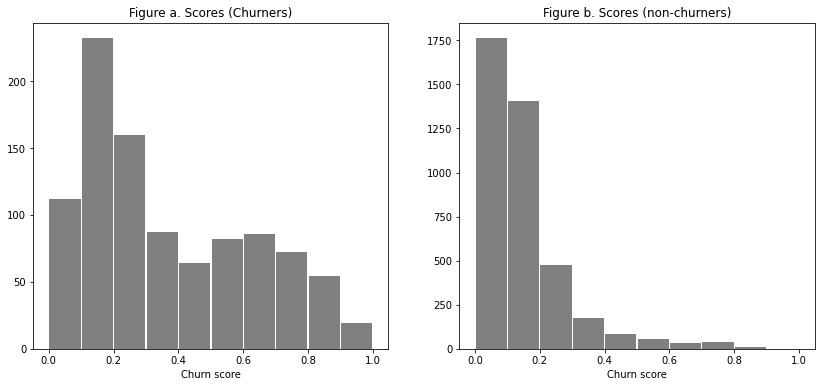

In [42]:
plt.figure(figsize = (14,6))
plt.subplot(1, 2, 1)
plt.hist(scores[y == 1], range=(0,1), color='gray', rwidth=0.96)
plt.title('Figure a. Scores (Churners)')
plt.xlabel('Churn score')
plt.subplot(1, 2, 2)
plt.hist(scores[y == 0], range=(0,1), color='gray', rwidth=0.96)
plt.title('Figure b. Scores (non-churners)')
plt.xlabel('Churn score');

You can now imagine the cutoff as a vertical line, and move it, right or left of the default value 0.5. Samples falling on the right of the vertical line would be classified as positive. Those falling on the left, as negative.

### The default cutoff

The default cutoff, used by the method `predict`, is 0.5. So, the predicted values for this cutoff are obtained as: 

In [54]:
ypred = logclf.predict(X)

It is plainly seen, in Figure a, that with this cutoff we miss more than one half of the churners. So, in spite of the accuracy, our model would not be adequate for a business application.

The **confusion matrix** resulting from the cross tabulation of the actual and the predicted target values, will confirm this visual intuition. Confusion matrices can be obtained in many ways. For instance, with the function `confusion_matrix` of the scikit-learn subpackage `metrics`:

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, ypred)

array([[3896,  136],
       [ 655,  313]])

The accuracy returned by the method `logclf.score` is the sum of the diagonal terms of this matrix divided by the sum of all terms of the matrix. It can also calculated directly:

In [56]:
np.mean(y == ypred).round(3)

0.842

As we guessed from the histogram, our churn model is not capturing enough churners (304/968) for a business application. Let us try a different one.

### A lower cutoff

To predict more positive, we have to lower the cutoff. Figure a suggests that we have to go down to about 0.2 make a real difference. But Figure b warns us against lowering it further. So, I will try 0.2. The new vector of predicted target values is then obtained as:

In [57]:
ypred = (scores > 0.2).astype('int')

The new confusion matrix is:

In [58]:
confusion_matrix(y, ypred)

array([[3166,  866],
       [ 344,  624]])

Indeed, we are capturing about 2/3 of the churners. This comes at the price of raising the false positives to 866, which affects the accuracy:

In [59]:
np.mean(y == ypred).round(3)

0.758

A clear way to summarize the evaluation of the model comes through the true positive and false positive rates. They can be extracted from the confusion matrix or calculated directly. The **true postive rate** is the proportion of true positives among the actual positives:

In [60]:
np.mean(ypred[y == 1]).round(3)

0.645

The **false positive rate** is the proportion of false positives among the actual negatives:

In [61]:
np.mean(ypred[y == 0]).round(3)

0.215

### Homework

1. There is no formula to calculate the coefficients of a logistic regression, as it happens with linear regression. So, the best thing you can get is an approximation to the optimal coefficients by means of an iterative method, which is called the **solver**. There are many options for the solver, and I have used here the scikit-learn default, to make it simple. But it turns out that the default number of iterations is not enough in many cases and you get a warning from Python. To grasp this point, try different values for `max_iter` in the specification of the logistic regression estimator. Examine how the number of iterations affects the accuracy of the classifier.

2. Assume that the Omicron management plans to offer a 20% discount to the customers that the model classifies as potential churners, and that this offer is going to have a 100% success, so the company will retain all the churners detected. Evaluate the benefit produced by this retention policy with the two models presented here.

3. Define a Python function which gives the benefit in terms of the cutoff and find an optimal cutoff for this retention policy.